In [1]:
from bs4 import BeautifulSoup
import pandas as pd
from urllib.request import urlopen

url = "https://music.bugs.co.kr/chart/track/week/total?chartdate=20190621"
page = urlopen(url)
soup =BeautifulSoup(page,'html.parser')

print(soup.prettify())

<!DOCTYPE html>
<html lang="ko">
 <head>
  <!-- bgsweb-www903.svr.toastmaker.net -->
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="음악,음악 스트리밍,최신음악,인기가요,뮤직비디오,앨범,플레이어,mp3 다운로드,놀면뭐하니,유플래쉬,유플래시" name="keywords">
   <!-- bgsweb-www903.svr.toastmaker.net -->
   <script type="text/javascript">
    if(!(location.href.indexOf("music.bugs.co.kr/newPlayer") >= 0 || location.href.indexOf("music.bugs.co.kr/newRadio") >= 0 || location.href.indexOf("localhost") >= 0))
		document.domain = 'bugs.co.kr';

	var g_urlBase = "https://www.bugs.co.kr";
	var g_urlWww = "https://www.bugs.co.kr";
	var g_urlSecure = "https://secure.bugs.co.kr";
	var g_urlMusic = "https://music.bugs.co.kr";
	var g_urlMusicSecure = "https://music.bugs.co.kr";
	var g_urlMember = "https://secure.bugs.co.kr/member";
	var g_urlFile = "https://file.bugsm.co.kr/wbugs";
	var g_urlFile_n ="https://file.bugsm.co.kr/nbugs"; 
	//var g_urlSwf = "https://music.bugs.co.kr/swf";
	var g_urlSw

In [2]:
soup.find_all('div','ranking')[0].strong.string

'1'

In [3]:
soup.find_all('p','title')[0].a.string

'술이 문제야'

In [4]:
soup.find_all('p','artist')[0].a.string

'장혜진'

In [5]:
soup.find_all('a','album')[1].string #인덱스는 홀수만!!!

'술이 문제야'

In [6]:
date = pd.date_range('2019-06-14',periods=8, freq='7d') #d는 day, 1/15까지 넣을거
print(date[0])
print(type(date[0]))
print(type(date))
date

2019-06-14 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


DatetimeIndex(['2019-06-14', '2019-06-21', '2019-06-28', '2019-07-05',
               '2019-07-12', '2019-07-19', '2019-07-26', '2019-08-02'],
              dtype='datetime64[ns]', freq='7D')

In [7]:
import urllib

from tqdm import tqdm_notebook

music_date = []
music_title = []
music_artist = []
music_album = []
music_ranking = []


for today in tqdm_notebook(date):
    url = "https://music.bugs.co.kr/chart/track/week/total?chartdate={date}" #date 값 넣어주기 위해 {}
    html = url.format(date= urllib.parse.quote(today.strftime('%Y%m%d')))
    response = urlopen(html)
    
    soup = BeautifulSoup(response, 'html.parser')
    end = 50 #영화 갯수 체크
    
    music_date.extend([today for n in range(end)])
    music_title.extend([soup.find_all('p','title')[n].a.string for n in range(end)])
    music_artist.extend([soup.find_all('p','artist')[n].a.string for n in range(end)])
    music_album.extend([soup.find_all('a','album')[n+1].string for n in range(end)])
    music_ranking.extend([soup.find_all('div','ranking')[n].strong.string for n in range(end)])
    

In [8]:
print(music_date)
print(music_title)
print(music_artist)
print(music_album)
print(music_ranking)

[Timestamp('2019-06-14 00:00:00', freq='7D'), Timestamp('2019-06-14 00:00:00', freq='7D'), Timestamp('2019-06-14 00:00:00', freq='7D'), Timestamp('2019-06-14 00:00:00', freq='7D'), Timestamp('2019-06-14 00:00:00', freq='7D'), Timestamp('2019-06-14 00:00:00', freq='7D'), Timestamp('2019-06-14 00:00:00', freq='7D'), Timestamp('2019-06-14 00:00:00', freq='7D'), Timestamp('2019-06-14 00:00:00', freq='7D'), Timestamp('2019-06-14 00:00:00', freq='7D'), Timestamp('2019-06-14 00:00:00', freq='7D'), Timestamp('2019-06-14 00:00:00', freq='7D'), Timestamp('2019-06-14 00:00:00', freq='7D'), Timestamp('2019-06-14 00:00:00', freq='7D'), Timestamp('2019-06-14 00:00:00', freq='7D'), Timestamp('2019-06-14 00:00:00', freq='7D'), Timestamp('2019-06-14 00:00:00', freq='7D'), Timestamp('2019-06-14 00:00:00', freq='7D'), Timestamp('2019-06-14 00:00:00', freq='7D'), Timestamp('2019-06-14 00:00:00', freq='7D'), Timestamp('2019-06-14 00:00:00', freq='7D'), Timestamp('2019-06-14 00:00:00', freq='7D'), Timestamp


['솔직하게 말해서 나', 'Speechless (Full)', '2002', 'A Whole New World', '서울 밤 (feat. 빈지노)', '사랑에 연습이 있었다면 (Prod. 2soo)', '누구 없소 (NO ONE) (Feat. B.I of iKON)', 'bad guy', '너에게 못했던 내 마지막 말은', 'BIRTHDAY', '작은 것들을 위한 시 (Boy With Luv) (feat. Halsey)', '아퍼 (Feat. Kid Milli, Lil tachi, 김승민, NO:EL, C JAMM)', 'FANCY', '사랑이 식었다고 말해도 돼', 'Arabian Nights (2019)', 'Prince Ali', '사계 (Four Seasons)', '주저하는 연인들을 위해', "If I Can't Have You", '노래방에서', 'AH YEAH (아예)', 'Friend Like Me', '다섯 번째 계절 (SSFWL)', '교통정리 (Feat. 헤이즈)', 'Dream Glow (BTS WORLD OST Part.1)', '대충 입고 나와', 'Goodbye', '비가 오잖아', "I Don't Care", 'Kill This Love', '나만, 봄', '니 소식', '그때가 좋았어', '달라달라', '모든 날, 모든 순간 (Every day, Every Moment)', '도쿄 (Feat. 유라 (youra))', '너를 만나', '옥탑방 (Rooftop)', 'Paris In The Rain', '오늘 밤에', '벌써 12시', "i'm so tired...", '별 보러 갈래?', '돈 Call Me (Prod.BRLLNT)', 'comethru', '사랑하긴 했었나요 스쳐가는 인연이었나요 짧지않은 우리 함께했던 시간들이 자꾸 내 마음을 가둬두네', '사계 (하루살이)', 'ME! (feat. Brendon Urie of Panic! At The Disco)', '비올레타', '뜨거운 여름밤은 가고 남은 건 볼품없지만'

['김나영', 'Naomi Scott', 'Anne-Marie(앤 마리)', 'Mena Massoud', '어반자카파', '임재현', '이하이', 'Billie Eilish(빌리 아일리시)', '다비치', '전소미', '방탄소년단', '기리보이', 'TWICE (트와이스)', '먼데이 키즈(Monday Kiz)', 'Will Smith(윌 스미스)', 'Will Smith(윌 스미스)', '태연 (TAEYEON)', '잔나비', 'Shawn Mendes(션 멘데스)', '장범준', 'WINNER', 'Will Smith(윌 스미스)', '오마이걸(OH MY GIRL)', '기리보이', '방탄소년단', '우디(Woody)', '박효신', '소유 (SOYOU)', 'Ed Sheeran(에드 시런)', 'BLACKPINK', '볼빨간사춘기', '송하예', '케이시', 'ITZY (있지)', '폴킴(Paul Kim)', '기리보이', '폴킴(Paul Kim)', '엔플라잉(N.Flying)', 'Lauv(라우브)', '홍진영', '청하', 'Lauv(라우브)', '볼빨간사춘기', '염따', 'Jeremy Zucker', '잔나비', '엠씨더맥스(M.C THE MAX)', 'Taylor Swift(테일러 스위프트)', 'IZ*ONE(아이즈원)', '잔나비', '장혜진', 'Naomi Scott', 'Red Velvet (레드벨벳)', '김나영', 'Anne-Marie(앤 마리)', '어반자카파', 'Mena Massoud', '전소미', '임재현', '다비치', 'Billie Eilish(빌리 아일리시)', '송하예', '방탄소년단', 'Will Smith(윌 스미스)', '이하이', 'Will Smith(윌 스미스)', 'Red Velvet (레드벨벳)', '먼데이 키즈(Monday Kiz)', 'TWICE (트와이스)', 'Will Smith(윌 스미스)', '태연 (TAEYEON)', '기리보이', '장범준', '잔나비', 'Shawn Mendes(션 멘데스)',

['솔직하게 말해서 나', '알라딘 (Aladdin) OST', 'Speak Your Mind [Deluxe]', '알라딘 (Aladdin) OST', '서울 밤', '사랑에 연습이 있었다면', '24℃', 'WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?', '너에게 못했던 내 마지막 말은', 'BIRTHDAY', 'MAP OF THE SOUL : PERSONA', '100년제전문대학', 'FANCY YOU', '사랑이 식었다고 말해도 돼', '알라딘 (Aladdin) OST', '알라딘 (Aladdin) OST', '사계 (Four Seasons)', '전설', "If I Can't Have You", '장범준 3집', 'WE', '알라딘 (Aladdin) OST', 'THE FIFTH SEASON', '교통정리', 'Dream Glow (BTS WORLD OST Part.1)', '대충 입고 나와', 'Goodbye', '비가 오잖아', 'No.6 Collaborations Project', 'KILL THIS LOVE', '사춘기집Ⅰ 꽃기운', '니 소식', '그때가 좋았어', "IT'z Different", "'키스 먼저 할까요?' OST Part.3", '100년제전문대학', '너를 만나', "FLY HIGH PROJECT #2 '옥탑방'", 'I met you when I was 18. (the playlist)', 'Lots of Love', '벌써 12시', "i'm so tired...", '사춘기집Ⅰ 꽃기운', 'Dingo X 염따', 'summer,', '봉춤을 추네', 'Circular', 'ME! (feat. Brendon Urie of Panic! At The Disco)', 'HEART*IZ', 'MONKEY HOTEL', '술이 문제야', '알라딘 (Aladdin) OST', '‘The ReVe Festival’ Day 1', '솔직하게 말해서 나', 'Speak Your Mind [Deluxe]', '서

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23

In [9]:
music = pd.DataFrame({'date': music_date,'ranking': music_ranking, 'title': music_title, 'artist': music_artist,  'album': music_album})
music

,date,ranking,title,artist,album
0,2019-06-14,1,솔직하게 말해서 나,김나영,솔직하게 말해서 나
1,2019-06-14,2,Speechless (Full),Naomi Scott,알라딘 (Aladdin) OST
2,2019-06-14,3,2002,Anne-Marie(앤 마리),Speak Your Mind [Deluxe]
3,2019-06-14,4,A Whole New World,Mena Massoud,알라딘 (Aladdin) OST
4,2019-06-14,5,서울 밤 (feat. 빈지노),어반자카파,서울 밤
...,...,...,...,...,...
395,2019-08-02,46,서울 밤 (feat. 빈지노),어반자카파,서울 밤
396,2019-08-02,47,Paris In The Rain,Lauv(라우브),I met you when I was 18. (the playlist)
397,2019-08-02,48,Prince Ali,Will Smith(윌 스미스),알라딘 (Aladdin) OST
398,2019-08-02,49,짐살라빔 (Zimzalabim),Red Velvet (레드벨벳),‘The ReVe Festival’ Day 1


In [10]:
import numpy as np

music['ranking'] = pd.to_numeric(music['ranking'])

music_unique = pd.pivot_table(music, index=['title'], aggfunc = np.mean) #평균은 np.mean
music_unique = music_unique.sort_values(by='ranking', ascending = True)
music_unique

,ranking
title,
ICY,1.000000
술이 문제야,4.285714
헤어져줘서 고마워,4.800000
내 맘을 볼 수 있나요,5.000000
Another Day,5.000000
...,...
사계 (하루살이),48.000000
비올레타,49.000000
ME! (feat. Brendon Urie of Panic! At The Disco),49.000000


In [11]:

music_pivot= pd.pivot_table(music,
                           index=['title', 'artist','album'],
                           columns=['date'],
                           values='ranking') #첨에 리스트로 선언해줬으니깐 걍 []넣었다가 droplevel로 뺴줌

music_pivot.to_csv('../data/04. music_pivot_table.csv', 
                       sep=',',
                       encoding='utf-8')
music_pivot.head()

,,date,2019-06-14,2019-06-21,2019-06-28,2019-07-05,2019-07-12,2019-07-19,2019-07-26,2019-08-02
title,artist,album,,,,,,,,
2002,Anne-Marie(앤 마리),Speak Your Mind [Deluxe],3.0,5.0,7.0,10.0,12.0,13.0,13.0,6.0
A Whole New World,Mena Massoud,알라딘 (Aladdin) OST,4.0,7.0,9.0,12.0,20.0,19.0,22.0,25.0
AH YEAH (아예),WINNER,WE,21.0,34.0,46.0,NaN,NaN,NaN,NaN,NaN
Another Day,먼데이 키즈(Monday Kiz),호텔 델루나 OST Part.1,NaN,NaN,NaN,NaN,NaN,2.0,4.0,9.0
Arabian Nights (2019),Will Smith(윌 스미스),알라딘 (Aladdin) OST,15.0,16.0,18.0,26.0,35.0,40.0,NaN,NaN


In [14]:
import platform
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)

C:\Users\eunhye\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


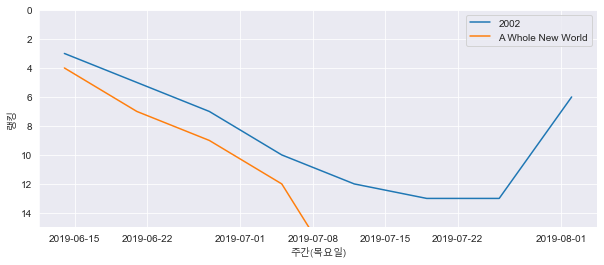

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style("darkgrid")

changePoint = music.query("title == '2002'")
changePoint2 = music.query("title == 'A Whole New World'")

plt.figure(figsize=(10,4))
plt.ylim(ymax = 0, ymin = 15)
plt.xlabel('주간(목요일)', family=font_name)
plt.ylabel('랭킹', family=font_name)
plt.plot(changePoint['date'], changePoint['ranking'], label='2002')
plt.plot(changePoint2['date'], changePoint2['ranking'], label='A Whole New World')
plt.legend(loc = 'best')
plt.show()

# selected = music.query('ranking > 30')
# sns.boxplot(x="date", y="ranking",data=selected)

In [16]:
for i in range(0,5):
    print(music_pivot.index[i][0])

2002
A Whole New World
AH YEAH (아예)
Another Day
Arabian Nights (2019)


In [17]:
music_pivot.plot(y=['술이 문제야',
                    '비올레타',
                    '사계 (하루살이)',
                    '뜨거운 여름밤은 가고 남은 건 볼품없지만'])
plt.show()

KeyError: "None of [Index(['술이 문제야', '비올레타', '사계 (하루살이)', '뜨거운 여름밤은 가고 남은 건 볼품없지만'], dtype='object', name='date')] are in the [columns]"